In [1]:
using Pkg
Pkg.activate("./")
Pkg.instantiate()

  Activating new project at `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse`
  No Changes to `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse/Project.toml`
  No Changes to `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse/Manifest.toml`


Following code block need to be specific of computer resource where we are running notebook

In [2]:
computer = "pcfamaf"

if computer == "notebook"
    kernel_dir = "mendez"
elseif computer == "pcfamaf"
    kernel_dir = "martin"
elseif computer == "ccad"
    kernel_dir = "martinmendez"
end

FEMTISE_PATH = "/home/$(kernel_dir)/github_repositories/my_repositories/FEMTISE.jl"

"/home/martin/github_repositories/my_repositories/FEMTISE.jl"

In [4]:
develop_package = false
develop_package ? Pkg.develop(path=FEMTISE_PATH) : nothing

In [9]:
install_pkg = true
if install_pkg
    # Pkg.add("Revise")
    # Pkg.add("Plots")
    # Pkg.add("PlotlyJS")
    Pkg.add("Gridap")
end
using Revise;
using FEMTISE;
using Plots;
using Gridap;

   Resolving package versions...
   Installed Gridap ─ v0.18.3
    Updating `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse/Project.toml`
  [56d4f2e9] + Gridap v0.18.3
    Updating `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse/Manifest.toml`
  [56d4f2e9] ↑ Gridap v0.18.2 ⇒ v0.18.3
Precompiling project...
  ✓ Gridap
  ✓ GridapDistributed
  ✓ GridapGmsh
  ✓ FEMTISE
  4 dependencies successfully precompiled in 72 seconds. 270 already precompiled.
  4 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [227]:
include("./plot_post_proccesing_data.jl")
include("./evolution_schroedinger_equation.jl")

evolution_schroedinger_by_euler_02

In [12]:
simulation_info, output_data = collect_result_data(true,"./input")

(InputData1D{Tuple{String, String}, Params1D, Bool}("./output", "./adhoc_potential_function", Params1D("1D", 100.0, "s", 0.1, 10, 0.0, "qho_1d", (1.0, 0.0)), false, ("jld2", "all")), DefaultJLD2AllEigenProblem{Vector{Float64}, Vector{VectorValue{1, Float64}}, Gridap.Geometry.BodyFittedTriangulation{1, 1, Gridap.Geometry.UnstructuredDiscreteModel{1, 1, Float64, Gridap.Geometry.Oriented}, Gridap.Geometry.UnstructuredGrid{1, 1, Float64, Gridap.Geometry.Oriented, Nothing}, Gridap.Arrays.IdentityVector{Int64}}, BoundaryTriangulation{0, 1, Gridap.Geometry.BodyFittedTriangulation{0, 1, Gridap.Geometry.UnstructuredDiscreteModel{1, 1, Float64, Gridap.Geometry.Oriented}, Gridap.Geometry.GridView{0, 1, Gridap.Geometry.UnstructuredGrid{0, 1, Float64, Gridap.Geometry.NonOriented, Nothing}, Vector{Int64}}, Vector{Int64}}, Gridap.Geometry.FaceToCellGlue{Vector{Int64}, FillArrays.Fill{Int64, 1, Tuple{Base.OneTo{Int64}}}, Gridap.Arrays.LazyArray{FillArrays.Fill{Reindex{Vector{Int8}}, 1, Tuple{Base.OneT

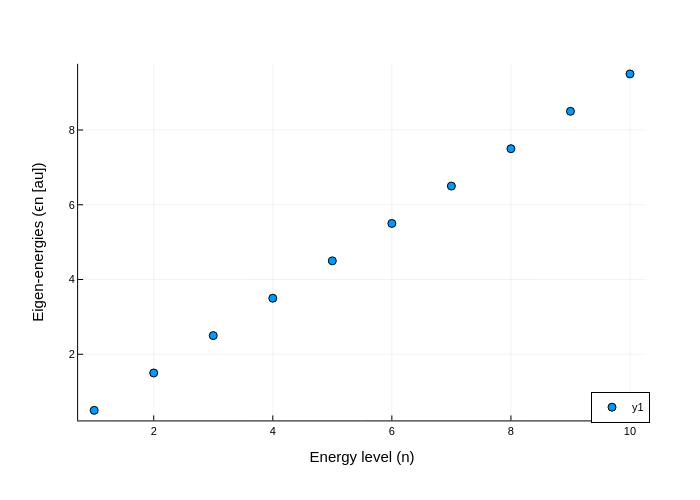

In [13]:
fig1 = plot_eigenvalues(simulation_info, output_data)
display(fig1)

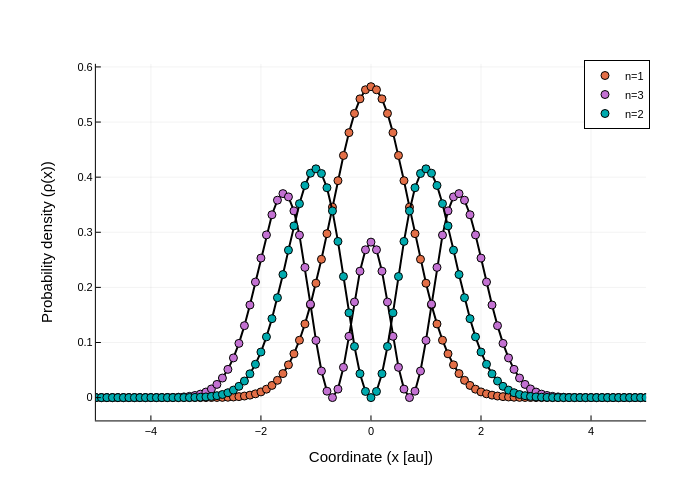

In [27]:
range_to_show=range(1,step=1,length=3)
fig2 = plot_eigenstates(simulation_info, output_data,range_to_show)
fig2 = plot!(fig2,xlim=(-5,5))
display(fig2)

In [31]:
fieldnames(typeof(output_data))

(:ϵ, :ϕ, :r, :pts, :Ω, :dΩ, :Γ, :dΓ, :USpace, :VSpace, :model)

In [84]:
init_wave_function = (output_data.ϕ[1]+output_data.ϕ[2])/sqrt(2)

OperationCellField():
 num_cells: 1000
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17054870472661200815

In [88]:
time=[0.0 + i*1 for i in 0:10]

11-element Vector{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [89]:
wave_function = evolution_schrodinger(init_wave_function,output_data.ϕ,output_data.ϵ,output_data.USpace,output_data.dΩ,time)

11-element Vector{CellField}:
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()

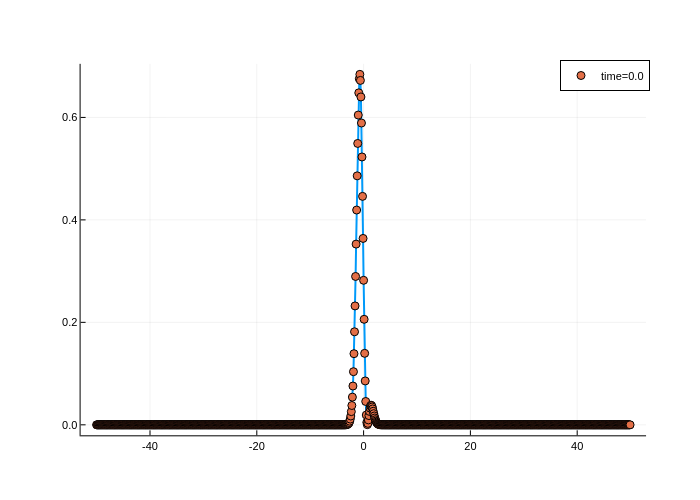

In [113]:
plotlyjs()
figure = plot()
for index_time in [1]
    rho = real.(conj.(wave_function[index_time].(output_data.pts)).*(wave_function[index_time].(output_data.pts)))
    figure = plot!(figure,output_data.r,rho,lw=2,label="")
    figure = scatter!(figure,output_data.r,rho,lw=2,label="time=$(time[index_time])")
end
display(figure)

┌ Info: Saved animation to /home/martin/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse/wave_function.gif
└ @ Plots /home/martin/.julia/packages/Plots/du2dt/src/animation.jl:156


Plots.AnimatedGif("/home/martin/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse/wave_function.gif")
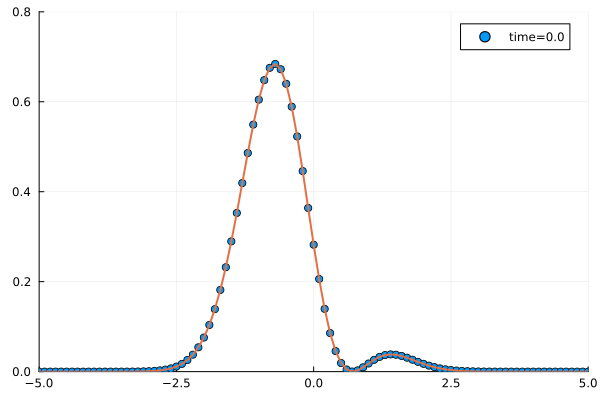

In [111]:
gr()
anim = @animate for index_time in eachindex(time)
    rho = real.(conj.(wave_function[index_time].(output_data.pts)).*(wave_function[index_time].(output_data.pts)))
    scatter(output_data.r,rho,label="time=$(time[index_time])",xlim=(-5,5),ylim=(0,0.8))
    plot!(output_data.r,rho,lw=2,label="")
end
gif(anim, "./wave_function.gif", fps = 1)

In [121]:
specific_time=500.0
wave_function_specific_time = evolution_schrodinger(init_wave_function,output_data.ϕ,output_data.ϵ,output_data.USpace,output_data.dΩ,specific_time)

SingleFieldFEFunction():
 num_cells: 1000
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17054870472661200815

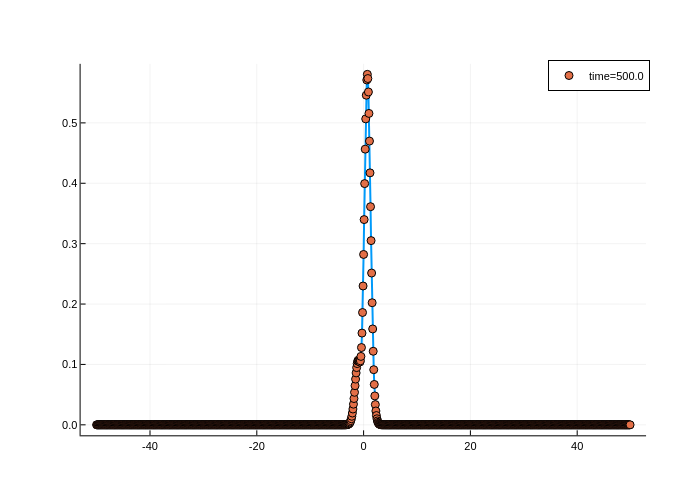

In [124]:
plotlyjs()
rho = real.(conj.(wave_function_specific_time.(output_data.pts)).*(wave_function_specific_time.(output_data.pts)))
figure = plot(output_data.r,rho,lw=2,label="")
figure = scatter!(figure,output_data.r,rho,lw=2,label="time=$(specific_time)")
display(figure)

In [138]:
sum(abs2,initial_coefficients(init_wave_function,output_data.ϕ,output_data.dΩ))

1.0000000000000002

In [193]:
init_wave_function = (output_data.ϕ[1]+output_data.ϕ[2])/sqrt(2)

OperationCellField():
 num_cells: 1000
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17054870472661200815

In [228]:
time=[0.0 + i*0.1 for i in 0:100]
autocorrelation=similar(time)
autocorrelation[1]=abs2(sum(∫(conj(init_wave_function)*init_wave_function)*output_data.dΩ))
for index_time in 2:length(time)
    wave_function_specific_time = evolution_schrodinger_v2(init_wave_function,output_data.ϕ,output_data.ϵ,output_data.USpace,output_data.dΩ,time[index_time]) 
    autocorrelation[index_time]=abs2(sum(∫(conj(init_wave_function)*wave_function_specific_time)*output_data.dΩ))
end

https://en.wikipedia.org/wiki/Rabi_cycle

In [236]:
real(output_data.ϵ[2])-real(output_data.ϵ[1])/2

1.2500016890807821

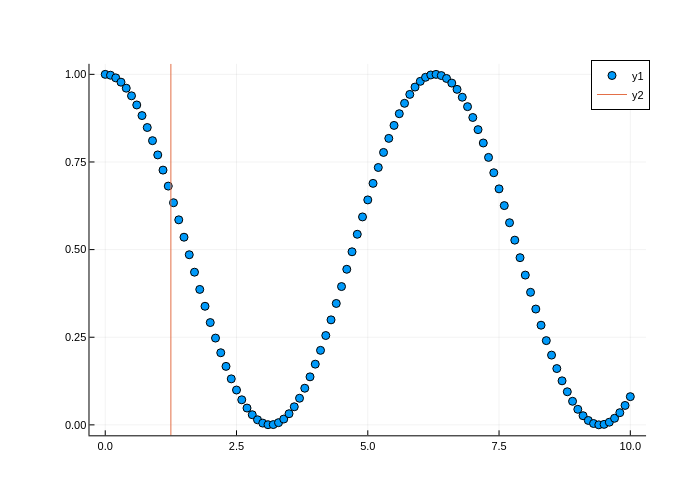

In [237]:

scatter(time,autocorrelation)
plot!([1.25],seriestype="vline")